<a href="https://colab.research.google.com/github/biswajit8167/Google-play-store-app-analysis/blob/main/heartdisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
 df = pd.read_csv('heart.csv')

In [4]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [8]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 723


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


/tmp/ipython-input-365956159.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='target', data=df, palette='viridis')


Text(0, 0.5, 'Count')

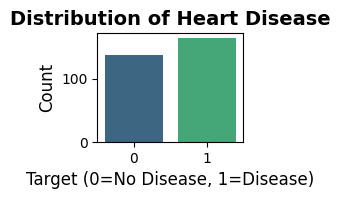

In [11]:
plt.subplot(3, 3, 1)
ax = sns.countplot(x='target', data=df, palette='viridis')
plt.title('Distribution of Heart Disease', fontsize=14, fontweight='bold')
plt.xlabel('Target (0=No Disease, 1=Disease)', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Frequency')

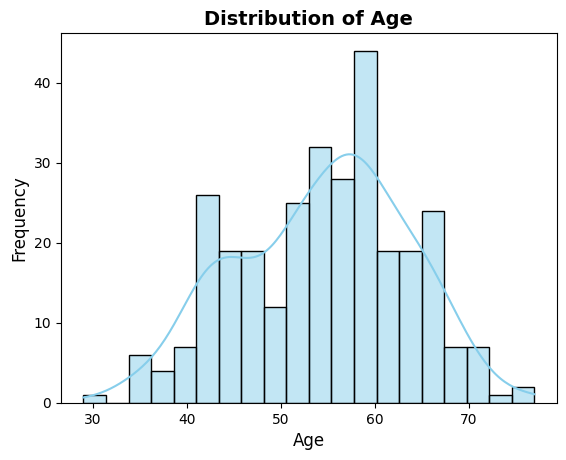

In [15]:
# --- C. Distribution of Age ---
plt.subplot(1, 1, 1)
sns.histplot(df['age'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Age', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

Text(0, 0.5, 'Count')

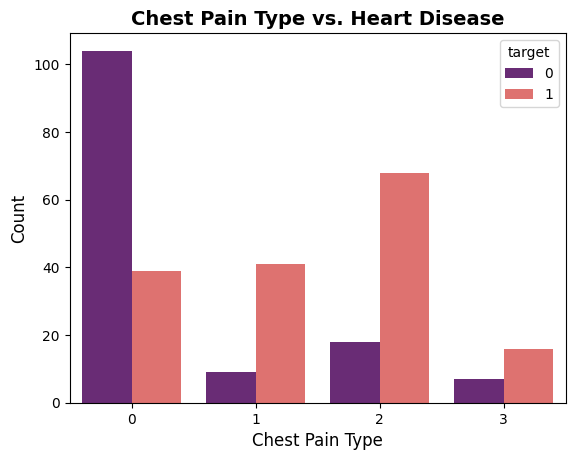

In [18]:
plt.subplot(1, 1, 1)
sns.countplot(x='cp', hue='target', data=df, palette='magma')
plt.title('Chest Pain Type vs. Heart Disease', fontsize=14, fontweight='bold')
plt.xlabel('Chest Pain Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

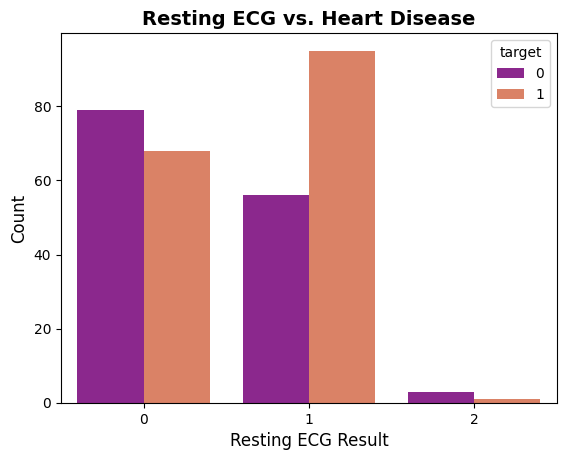

In [20]:
plt.subplot(1, 1, 1)
sns.countplot(x='restecg', hue='target', data=df, palette='plasma')
plt.title('Resting ECG vs. Heart Disease', fontsize=14, fontweight='bold')
plt.xlabel('Resting ECG Result', fontsize=12)
plt.ylabel('Count', fontsize=12)

/tmp/ipython-input-458507552.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y='thalach', data=df, palette='viridis')


Text(0, 0.5, 'Maximum Heart Rate Achieved (thalach)')

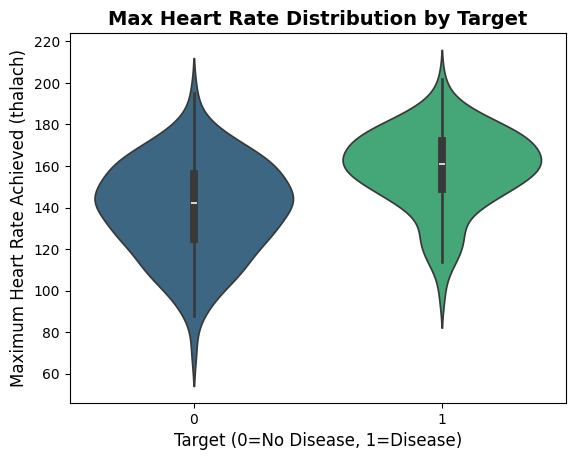

In [21]:
# --- F. Max Heart Rate (thalach) Distribution by Target ---
plt.subplot(1, 1, 1)
sns.violinplot(x='target', y='thalach', data=df, palette='viridis')
plt.title('Max Heart Rate Distribution by Target', fontsize=14, fontweight='bold')
plt.xlabel('Target (0=No Disease, 1=Disease)', fontsize=12)
plt.ylabel('Maximum Heart Rate Achieved (thalach)', fontsize=12)

/tmp/ipython-input-127983347.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='oldpeak', data=df, palette='cool')


Text(0, 0.5, 'ST Depression induced by exercise relative to rest')

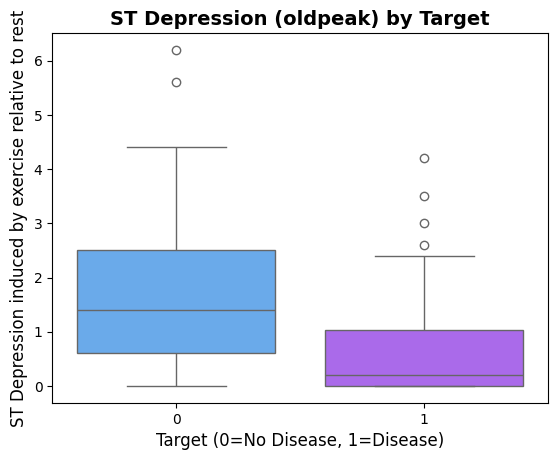

In [22]:
# --- G. Oldpeak Distribution by Target ---
plt.subplot(1, 1, 1)
sns.boxplot(x='target', y='oldpeak', data=df, palette='cool')
plt.title('ST Depression (oldpeak) by Target', fontsize=14, fontweight='bold')
plt.xlabel('Target (0=No Disease, 1=Disease)', fontsize=12)
plt.ylabel('ST Depression induced by exercise relative to rest', fontsize=12)